In [17]:
import gzip
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd

# Reading the MNIST dataset

Train data (X) size: (60000, 28, 28), and labels (Y) size: (60000,)
Test data (X) size: (10000, 28, 28), and labels (Y) size: (10000,)


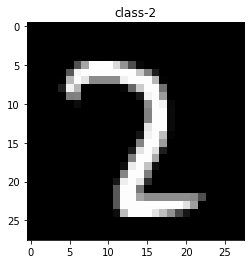

Train image 13654-th sample 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  82 165 255 255 254 217 146  77   8   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  88 245 253 253 253 253 253 253 253 199 128  26   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   1 185 253 229 139 139 139 139 240 253 253 253 182   2
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0  32 242 183   0  

In [18]:
def read_images(filename):
    """Read MNIST images"""
    
    with gzip.open(filename, 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of images
        image_count = int.from_bytes(f.read(4), 'big')
        # third 4 bytes is the row count
        row_count = int.from_bytes(f.read(4), 'big')
        # fourth 4 bytes is the column count
        column_count = int.from_bytes(f.read(4), 'big')
        # rest is the image pixel data, each pixel is stored as an unsigned byte
        # pixel values are 0 to 255
        image_data = f.read()
        images = np.frombuffer(image_data, dtype=np.uint8).reshape((image_count, row_count, column_count))
        
    return images

def read_labels(filename):
    """Read MNIST labels"""
    
    with gzip.open(filename, 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of labels
        label_count = int.from_bytes(f.read(4), 'big')
        # rest is the label data, each label is stored as unsigned byte
        # label values are 0 to 9
        label_data = f.read()
        labels = np.frombuffer(label_data, dtype=np.uint8)
        
    return labels


dataset_path = '/home/sysadm/Documents/Shibajee/Assignments/ML/'

train_image_filename = ''.join([dataset_path, 'train-images-idx3-ubyte.gz'])
train_label_filename = ''.join([dataset_path, 'train-labels-idx1-ubyte.gz'])

test_image_filename = ''.join([dataset_path, 't10k-images-idx3-ubyte.gz'])
test_label_filename = ''.join([dataset_path, 't10k-labels-idx1-ubyte.gz'])

train_images = read_images(train_image_filename)
train_labels = read_labels(train_label_filename)
print('Train data (X) size: {}, and labels (Y) size: {}' .format(train_images.shape, train_labels.shape))

test_images = read_images(test_image_filename)
test_labels = read_labels(test_label_filename)
print('Test data (X) size: {}, and labels (Y) size: {}' .format(test_images.shape, test_labels.shape))

rand_ids = np.random.choice(train_images.shape[0])
plt.imshow(train_images[rand_ids, :, :], cmap='gray')
plt.title('class-'+str(train_labels[rand_ids]))
plt.show()

print('Train image {}-th sample ' .format(rand_ids))
print(train_images[rand_ids, :, :])



# Extracting 20% data from the training set for validation set

In [19]:
MNIST_data = train_images.reshape(len(train_images), 28*28); MNIST_data.shape

(60000, 784)

In [20]:
MNIST_labels = train_labels; MNIST_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [21]:
A = np.random.randint(60000, size = 60000)

In [22]:
training_data = MNIST_data[A[0:48000]]; training_data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [23]:
validation_data =MNIST_data[A[48000:60000]]; validation_data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [24]:
training_labels = MNIST_labels[A[0:48000]]; training_labels

array([3, 2, 5, ..., 5, 3, 7], dtype=uint8)

In [25]:
(unique, counts) = np.unique(training_labels, return_counts=True)
pd.DataFrame(unique, counts) 

,0
4775,0
5439,1
4739,2
4865,3
4755,4
4350,5
4761,6
4970,7
4676,8
4670,9


In [26]:
validation_labels = MNIST_labels[A[48000:60000]]; validation_labels

array([5, 1, 6, ..., 6, 7, 8], dtype=uint8)

In [27]:
(unique, counts) = np.unique(validation_labels, return_counts=True)
pd.DataFrame(unique, counts) 

,0
1144,0
1339,1
1180,2
1171,3
1226,4
1105,5
1193,6
1289,7
1183,8
1170,9


# Randomizing the test data

In [28]:
MNIST_test_data = test_images.reshape(len(test_images), 28*28); MNIST_test_data.shape

(10000, 784)

In [29]:
B = np.random.randint(10000, size = 10000)

In [30]:
test_data = MNIST_test_data[B[0:10000]]; test_data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [31]:
test_labels = test_labels[B[0:10000]]; test_labels

array([6, 0, 7, ..., 9, 3, 7], dtype=uint8)

In [32]:
(unique, counts) = np.unique(test_labels, return_counts=True)
pd.DataFrame(unique, counts) 

,0
980,0
1153,1
1016,2
991,3
985,4
918,5
988,6
1023,7
979,8
967,9


# Implementing kNN classifier

In [33]:
## Manhattan Distance
def Manhattan_distance(x,y):
    p = np.abs(np.array(x)-np.array(y))
    M = p.sum()
    return M


In [34]:

def Manhattan_minimum(n):
    distances = []
    for j in range(n):
        distance = []
        for i in range(len(training_data)):
            dis = (Manhattan_distance(validation_data[j], training_data[i]), training_labels[i])
            distance.append(dis)
        distances.append(sorted(distance))
    return distances


In [35]:
man = Manhattan_minimum(1000)

In [36]:
def Manhattan_nearest(k):
    predic = []
    for i in range(len(man)):
        pred = []
        for j in range(k):
            pre = man[i][j]
            pred.append(pre)
        predic.append(pred)
    return predic


In [37]:
def acc(k):
    manp = Manhattan_nearest(k)    ## Change the K value
    labels = []
    for i in range(len(man)):
        label = []
        for j in range(len(manp[i])):
            lab = manp[i][j][1]
            label.append(lab)
        labels.append(label)
        digit = []
    for i in range(len(labels)):
        digit.append(max(labels[i], key = labels[i].count))
    sum = 0
    for i in range(len(digit)):
        if(digit[i] == validation_labels[i]):
            sum+= 1
        else :
            sum+=0
    accuracy = (sum/len(digit))*100; accuracy
    return accuracy

In [38]:
accur = []
for k in range(1,26,2):
    f = (acc(k),k)
    accur.append(f)
    
accu = pd.DataFrame(accur)
accu.columns = ['Accuracy', 'K-value']; accu



,Accuracy,K-value
0,87.7,1
1,81.1,3
2,79.2,5
3,80.4,7
4,81.3,9
5,80.8,11
6,80.7,13
7,81.4,15
8,80.7,17
9,80.9,19


# Accuracy on validation data set

In [39]:
accuracy = accu.Accuracy.max(); accuracy

87.7

# K value

In [40]:
index = accu['Accuracy'].idxmax()
K = accu['K-value'][index]; K

1

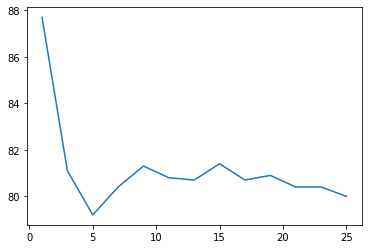

In [41]:
plt.plot(accu["K-value"],accu['Accuracy'])

# Testing Data Set

In [42]:
def Manhattan_test_minimum(n):
    distances = []
    for j in range(n):
        distance = []
        for i in range(len(training_data)):
            dis = (Manhattan_distance(test_data[j], training_data[i]), training_labels[i])
            distance.append(dis)
        distances.append(sorted(distance))
    return distances


In [43]:
man_t = Manhattan_test_minimum(100)

In [44]:
def Manhattan_test_nearest(k):
    predic = []
    for i in range(len(man_t)):
        pred = []
        for j in range(k):
            pre = man_t[i][j]
            pred.append(pre)
        predic.append(pred)
    return predic


In [45]:
man_tp = Manhattan_test_nearest(k)    ## Change the K value
labels = []
for i in range(len(man_t)):
    label = []
    for j in range(len(man_tp[i])):
        lab = man_tp[i][j][1]
        label.append(lab)
    labels.append(label)
    digit = []
for i in range(len(labels)):
    digit.append(max(labels[i], key = labels[i].count))
sum = 0
for i in range(len(digit)):
    if(digit[i] == test_labels[i]):
        sum+= 1
    else :
        sum+=0
accuracy = (sum/len(digit))*100; accuracy
accuracy

82.0

In [46]:
act = []
for i in range(len(digit)):
    act.append(test_labels[i])

In [47]:
predicted = np.array(digit)
actual = np.array(act)

In [48]:
confusion_matrix = pd.crosstab(predicted, actual); confusion_matrix

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,9,0,0,0,0,0,0,0,0,0
1,0,8,0,0,3,2,3,0,2,1
2,0,0,10,0,0,0,0,0,0,0
3,0,0,0,7,0,0,0,0,0,0
4,0,0,0,0,6,0,0,0,0,0
5,0,0,0,0,0,4,0,0,0,0
6,1,0,0,0,0,1,14,0,0,0
7,0,0,0,1,0,0,0,10,0,0
8,0,0,1,1,0,1,1,0,8,0
